<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/_projects/Pima_People_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df=pd.read_csv('./data/diabetes_feature.csv')
df.shape

(768, 16)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [ ]:
X=df[['Glucose','BloodPressure','SkinThickness',
       'BMI','DiabetesPedigreeFunction','Age','Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [ ]:
y=df['Outcome']
y.shape

(768,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
X_test.shape,y_test.shape

((154, 9), (154,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=11,random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [ ]:
# 최적의 max_depth 찾기
from sklearn.metrics import accuracy_score

for max_depth in range(3,12):
    model=DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    y_predict=model.fit(X_train,y_train).predict(X_test)
    score=accuracy_score(y_test,y_predict)*100
    print(max_depth,score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


# Grid Search

In [ ]:
# GridSeach (하이퍼파라미터 최적화)
from sklearn.model_selection import GridSearchCV

model=DecisionTreeClassifier(random_state=42)
param_grid={'max_depth':range(3,12),
            'max_features':[0.3,0.5,0.7,0.9,1]}
clf=GridSearchCV(model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [ ]:
clf.best_params_ # 최적의 하이퍼파라미터 조합을 반환

{'max_depth': 5, 'max_features': 0.7}

In [ ]:
clf.best_estimator_ # 하이퍼파라미터 조합에 따라 학습된 모델을 반환

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [ ]:
clf.best_score_ # 최적의 하이퍼파라미터 조합에 대한 교차 검증에서 얻은 최고 점수 반환

0.8664934026389444

In [ ]:
# cv_results_ : GridSeachCV 실행 후, 하이퍼파라미터 조합에 대한 교차 검증 결과가 저장된 속성
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.009317,0.002987,0.005472,0.004879,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.007654,0.003407,0.004359,0.002234,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.006381,0.002814,0.005147,0.003508,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.007033,0.001398,0.008139,0.004452,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
17,0.007451,0.003864,0.003446,0.000917,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,5


In [ ]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
clf.score(X_test,y_test)

0.8701298701298701

# Random Search

In [ ]:
model

DecisionTreeClassifier(random_state=42)

In [ ]:
max_depth=np.random.randint(3,20,10) # 최솟값, 최댓값, 생성할 정수 개수
max_depth

array([ 4,  5, 10,  6, 14, 14, 11,  8, 11,  7])

In [ ]:
max_features=np.random.uniform(0.7,1.0,100) # 지정한 범위 내에서 균일 분포를 따르는 무작위 부동소수점 수 생성

In [ ]:
param_distributions={'max_depth':max_depth, # 결정트리의 최대 깊이
                     'max_features':max_features, # 각 트리 노드를 분할할 때 사용할 특성의 비율
                     'min_samples_split':list(range(2,7))} # 노드를 분할하기 위해 필요한 최소 샘플 수
param_distributions

{'max_depth': array([ 4,  5, 10,  6, 14, 14, 11,  8, 11,  7]),
 'max_features': array([0.85699273, 0.72187245, 0.83954198, 0.71273404, 0.98735061,
        0.84731503, 0.87681673, 0.94856908, 0.9207098 , 0.80817214,
        0.91150476, 0.88375431, 0.92332949, 0.8352215 , 0.72877581,
        0.88361196, 0.82986711, 0.85154014, 0.8962543 , 0.81690783,
        0.95092087, 0.88037684, 0.74366444, 0.70687443, 0.80811199,
        0.80668819, 0.83367316, 0.82806467, 0.96867236, 0.76509626,
        0.80598146, 0.84335763, 0.85342535, 0.79142406, 0.87584345,
        0.85530378, 0.86145354, 0.94410818, 0.91661046, 0.95933975,
        0.74625542, 0.7781821 , 0.99072604, 0.84403683, 0.98924915,
        0.98916383, 0.74096244, 0.79428239, 0.82839337, 0.8419982 ,
        0.86454557, 0.84502161, 0.86241351, 0.99403459, 0.82427918,
        0.70892576, 0.79782995, 0.75468089, 0.94544254, 0.7999001 ,
        0.89104693, 0.84238721, 0.79912205, 0.78537174, 0.88862701,
        0.86070692, 0.78624054, 0.775

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf=RandomizedSearchCV(model,
                       param_distributions, # 하이퍼파라미터의 분포를 정의한 딕셔너리
                       n_iter=1000, # 랜덤 서치에서 시도할 하이퍼파라미터 조합의 수
                       scoring='accuracy', # 모델 성능 평가에 사용할 지표 (여기서는 정확도)
                       n_jobs=-1, # 사용 가능한 모든 프로세서를 사용 (병렬 처리)
                       cv=5, # 교차 검증을 위한 폴드 수
                       random_state=42) # 난수 생성기를 위한 시드 값
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 4,  5, 10,  6, 14, 14, 11,  8, 11,  7]),
                                        'max_features': array([0.85699273, 0.72187245, 0.83954198, 0.71273404, 0.98735061,
       0.84731503, 0.87681673, 0.94856908, 0.9207098 , 0.80817214,
       0.91150476, 0.88375431, 0.92332949, 0.8352215 , 0.72877581,
       0....
       0.85829415, 0.90592785, 0.87524389, 0.76888592, 0.96940774,
       0.94108621, 0.81381302, 0.79316614, 0.7260409 , 0.93388246,
       0.93365539, 0.76872629, 0.92583318, 0.82953404, 0.89043192,
       0.97438035, 0.87882883, 0.88177761, 0.81762871, 0.81558518,
       0.98199465, 0.7292762 , 0.7581981 , 0.86901706, 0.77644431,
       0.87005816, 0.875033  , 0.85890118, 0.98980004, 0.930071  ]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [ ]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.8837543121464717, 'max_depth': 10}

In [ ]:
clf.best_score_

0.8713847794215648

In [ ]:
clf.score(X_test,y_test)

0.8571428571428571

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
247,0.005241,0.000138,0.002894,0.000161,4,0.829534,10,"{'min_samples_split': 4, 'max_features': 0.829...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
677,0.005115,0.000249,0.002991,0.000267,4,0.878829,10,"{'min_samples_split': 4, 'max_features': 0.878...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
852,0.005349,0.000174,0.003604,0.000947,4,0.888627,10,"{'min_samples_split': 4, 'max_features': 0.888...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
856,0.013576,0.003569,0.005353,0.002987,4,0.858901,10,"{'min_samples_split': 4, 'max_features': 0.858...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
388,0.005840,0.000901,0.002912,0.000103,4,0.828393,10,"{'min_samples_split': 4, 'max_features': 0.828...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf=RandomizedSearchCV(model,
                       param_distributions,
                       n_iter=1000,
                       scoring='precision', # '정밀도'를 지표로 학습
                       n_jobs=-1,
                       cv=5,
                       random_state=42)
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 4,  5, 10,  6, 14, 14, 11,  8, 11,  7]),
                                        'max_features': array([0.85699273, 0.72187245, 0.83954198, 0.71273404, 0.98735061,
       0.84731503, 0.87681673, 0.94856908, 0.9207098 , 0.80817214,
       0.91150476, 0.88375431, 0.92332949, 0.8352215 , 0.72877581,
       0....
       0.85829415, 0.90592785, 0.87524389, 0.76888592, 0.96940774,
       0.94108621, 0.81381302, 0.79316614, 0.7260409 , 0.93388246,
       0.93365539, 0.76872629, 0.92583318, 0.82953404, 0.89043192,
       0.97438035, 0.87882883, 0.88177761, 0.81762871, 0.81558518,
       0.98199465, 0.7292762 , 0.7581981 , 0.86901706, 0.77644431,
       0.87005816, 0.875033  , 0.85890118, 0.98980004, 0.930071  ]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='precision')

In [ ]:
clf.best_params_

{'min_samples_split': 3, 'max_features': 0.8803768407049033, 'max_depth': 4}

In [ ]:
clf.best_score_

0.8463288288288288

# 학습 & 예측

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
feature_names=X_train.columns.tolist()

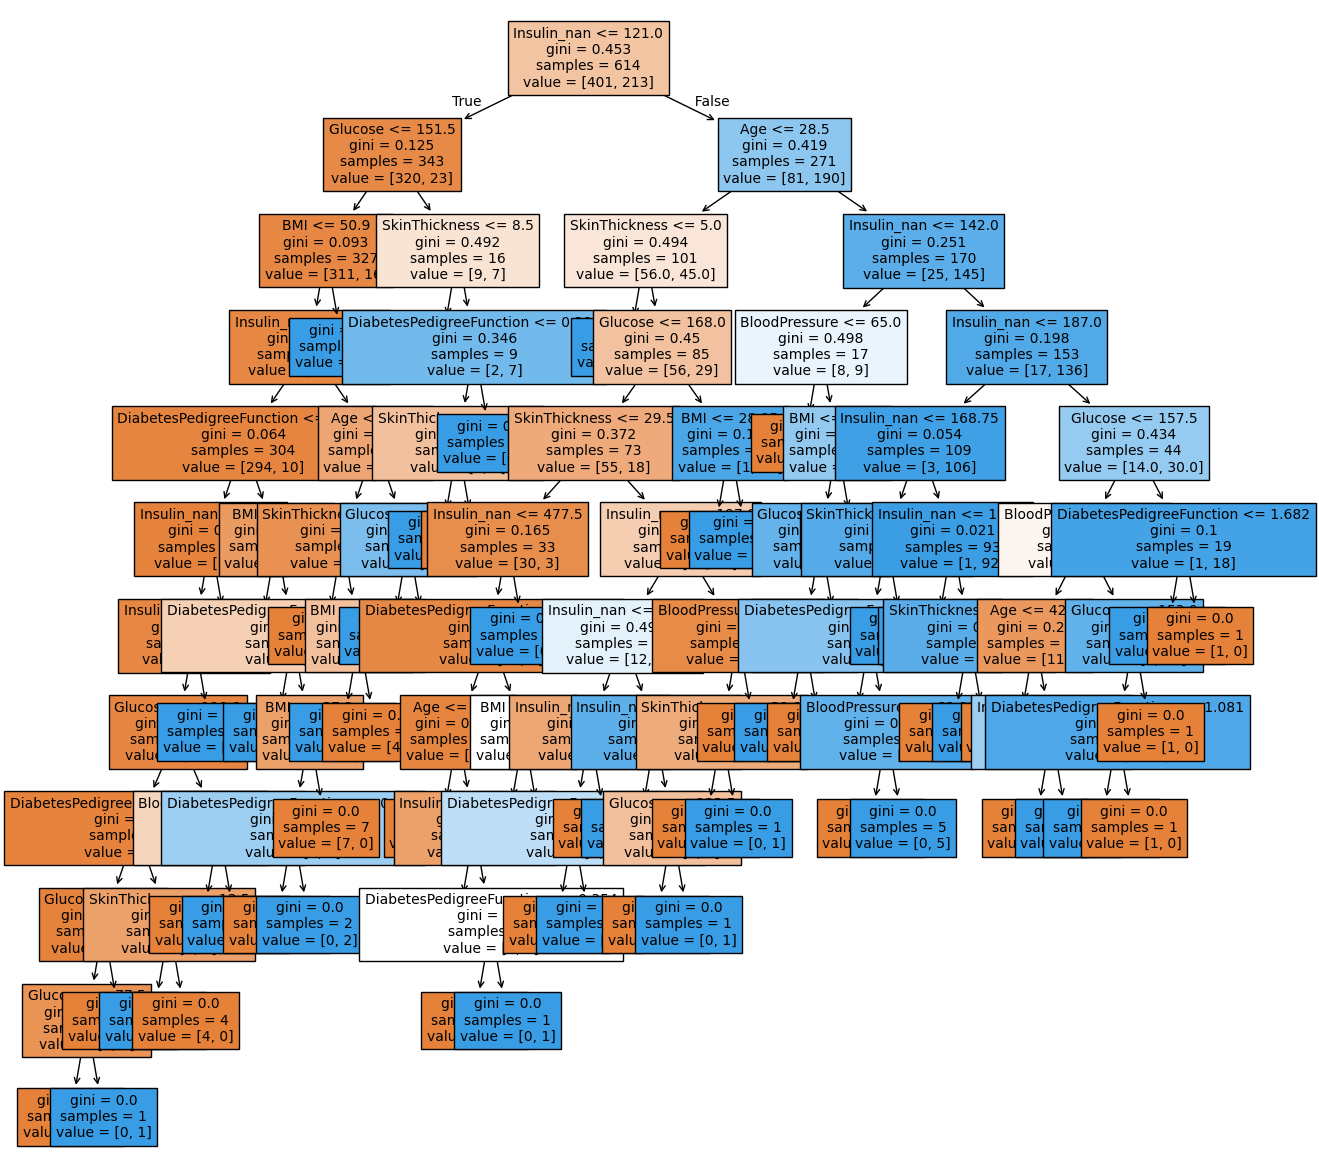

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree=plot_tree(model,feature_names=feature_names,fontsize=10,filled=True)

In [ ]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
abs(y_predict-y_test).sum()

28

In [ ]:
accuracy_score(y_test,y_predict)*100

81.81818181818183